## Mathematical Formula

For a vector **z**:

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

### Where:

- \( e \) = exponential function  
- \( z_i \) = individual logit  
- \( K \) = total number of classes  

## Softmax for Individual Classes (Example with 3 Classes)

For a vector:

z = [z₁, z₂, z₃]

The Softmax output for each class is:

$$
\sigma(z)_1 = \frac{e^{z_1}}{e^{z_1} + e^{z_2} + e^{z_3}}
$$

$$
\sigma(z)_2 = \frac{e^{z_2}}{e^{z_1} + e^{z_2} + e^{z_3}}
$$

$$
\sigma(z)_3 = \frac{e^{z_3}}{e^{z_1} + e^{z_2} + e^{z_3}}
$$

###

- Numerator = exponential of that class logit  
- Denominator = sum of exponentials of all logits  
- Outputs sum to 1  

$$
\sigma(z)_1 + \sigma(z)_2 + \sigma(z)_3 = 1
$$

## Training Intuition

> the above explanation is only intuition for understanding : BTS do not happen like this 

$$
z_1 = 7w_1^{(1)} + 70w_2^{(1)} + w_0^{(1)}
$$

$$
z_2 = 7w_1^{(2)} + 70w_2^{(2)} + w_0^{(2)}
$$

$$
z_3 = 7w_1^{(3)} + 70w_2^{(3)} + w_0^{(3)}
$$

$$
\sigma(y) = \frac{e^{z_1}}{e^{z_1} + e^{z_2} + e^{z_3}}
$$

$$
\sigma(N) = \frac{e^{z_2}}{e^{z_1} + e^{z_2} + e^{z_3}}
$$

$$
\sigma(O) = \frac{e^{z_3}}{e^{z_1} + e^{z_2} + e^{z_3}}
$$

$$
\sigma(y) = 0.40
$$

$$
\sigma(N) = 0.35
$$

$$
\sigma(N) = 0.25
$$

### Sklearn BTS implementation

##### Loss Function Previously

$$
L = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \right]
$$

##### Loss function in Softmax case 

$
L = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log\left(\hat{y}_k^{(i)}\right)
$


> example dataset :

| X1   | X2   | Y | Y (k=1) | Y (k=2) | Y (k=3) |
|------|------|---|---------|---------|---------|
| x11  | x12  | 1 | 1       | 0       | 0       |
| x21  | x22  | 2 | 0       | 1       | 0       |
| x31  | x32  | 3 | 0       | 0       | 1       |

$$
L =
y_1^{(1)} \log\left(\hat{y}_1^{(1)}\right)
+
y_2^{(2)} \log\left(\hat{y}_2^{(2)}\right)
+
y_3^{(3)} \log\left(\hat{y}_3^{(3)}\right)
$$

$$
\hat{y}_1^{(1)} =
\sigma \left(
w_1^{(1)} x_{11}
+
w_2^{(1)} x_{12}
+
w_0^{(1)}
\right)
$$

$$
\hat{y}_2^{(2)} =
\sigma \left(
w_1^{(2)} x_{21}
+
w_2^{(2)} x_{22}
+
w_0^{(2)}
\right)
$$

$$
\hat{y}_3^{(3)} =
\sigma \left(
w_1^{(3)} x_{31}
+
w_2^{(3)} x_{32}
+
w_0^{(3)}
\right)
$$

> coefficients : are
$$
W =
\begin{bmatrix}
w_1^{(1)} & w_2^{(1)} & w_0^{(1)} \\
w_1^{(2)} & w_2^{(2)} & w_0^{(2)} \\
w_1^{(3)} & w_2^{(3)} & w_0^{(3)}
\end{bmatrix}
$$

$$
\frac{\partial L}{\partial w_1^{(1)}},
\quad
\frac{\partial L}{\partial w_2^{(1)}},
\quad
\frac{\partial L}{\partial w_0^{(1)}},
\quad \ldots
$$

and the updates be like : 
$$
w_1^{(1)} =
w_1^{(1)}
-
\eta
\frac{\partial L}{\partial w_1^{(1)}}
$$


---

### Sklearn Demo

In [12]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = sns.load_dataset('iris')

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df = df[['sepal_length','petal_length','species']]

In [19]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [20]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
clf = LogisticRegression(solver='lbfgs')

In [34]:
clf.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [26]:
y_pred = clf.predict(X_test)

In [28]:
print(accuracy_score(y_test,y_pred))

1.0


In [35]:
print(clf.coef_.shape)

(3, 2)


In [29]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [30]:
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

C:\Users\diwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.09242380e-01, 1.90157191e-01, 6.00428887e-04]])

C:\Users\diwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


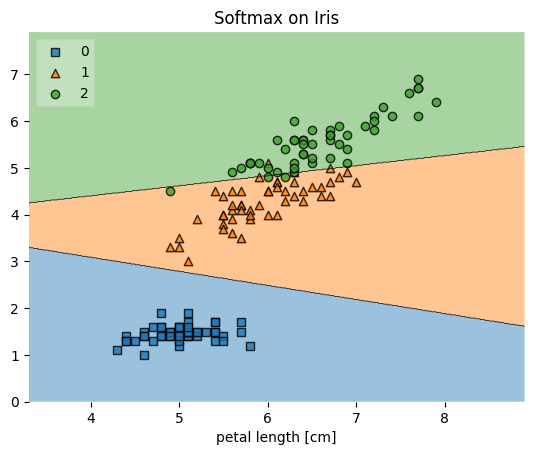

In [36]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()